# Modelisation de la consommation totale d'energie

In [42]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.preprocessing as sk_prepro
from sklearn import metrics

In [43]:
df = pd.read_csv('data_full.csv')

In [44]:
data_num = df
target_tag ='GHGEmissionsIntensity'
target = data_num[target_tag]
data_num = data_num.drop(labels = [target_tag,'SiteEnergyUse(kBtu)', 'ENERGYSTARScore','SiteEUI(kBtu/sf)', 'TotalGHGEmissions' ], axis = 1)

In [4]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Columns: 522 entries, 0 to ThirdLargestPropertyUseTypeGFA
dtypes: float64(522)
memory usage: 6.5 MB


## Modèle linéaire

In [5]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [6]:
from sklearn import linear_model
line_reg = linear_model.LinearRegression()

In [60]:
#first let's test this on knregressoe
xtrain, xtest, ytrain, ytest = train_test_split(data_num, target, test_size = 0.2)

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)

#log scale the target
ytrain = np.log(ytrain)
ytest = np.log(ytest)



In [8]:
def true_pred_plot(y_train,pred_train, y_test, pred_test):
    fig, ax = plt.subplots(2, figsize = (10,10))
    
    line_reg_train = line_reg.fit(np.array(pred_train).reshape(-1,1),y_train)
    r2_train = line_reg_train.score(np.array(pred_train).reshape(-1,1),y_train)
    rmse_train = (np.sqrt(metrics.mean_squared_error(y_train, pred_train))/np.mean(ytrain))
    a = float(line_reg_train.coef_)
    b= line_reg_train.intercept_
    ax[0].scatter( y_train, pred_train)
    ax[0].plot([a*np.abs(b)+b, a*y_train.max()+b],[np.abs(b), ytrain.max()], linestyle = 'dashed')
    ax[0].text(0.7,0.7,'R2 : {:.3f} NRMSE : {: .2f}'.format(r2_train,rmse_train), transform = ax[0].transAxes)
    ax[0].set_xlabel('True values')
    ax[0].set_ylabel('Predicted values')
    ax[0].set_xlim(y_train.min(),y_train.max())
    ax[0].set_ylim(pred_train.min(),pred_train.max())
    ax[0].set_title('On train values')

    line_reg_test  = line_reg.fit(np.array(pred_test).reshape(-1,1),y_test)
    r2_test =  line_reg_test.score(np.array(pred_test).reshape(-1,1),y_test)
    rmse_test = (np.sqrt(metrics.mean_squared_error(y_test, pred_test))/np.mean(ytest))
    a = float(line_reg_test.coef_)
    b=  line_reg_test.intercept_
    ax[1].scatter( y_test, pred_test)
    ax[1].plot([a*np.abs(b)+b, a*y_test.max()+b],[np.abs(b), y_test.max()], linestyle = 'dashed')
    ax[1].text(0.7,0.7,'R2 : {:.3f} NRMSE : {: .2f}'.format(r2_test, rmse_test), transform = ax[1].transAxes)
    ax[1].set_xlabel('True values')
    ax[1].set_ylabel('Predicted values')
    ax[1].set_xlim(y_test.min(),y_test.max())
    ax[1].set_ylim(pred_test.min(),pred_test.max())
    ax[1].set_title('On test values')
    
    plt.show()
    plt.clf()

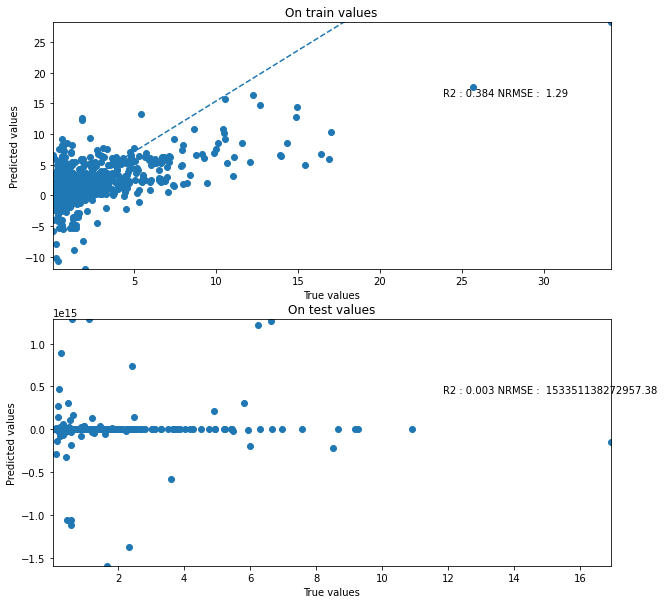

<Figure size 432x288 with 0 Axes>

In [50]:
line_reg_m = linear_model.LinearRegression()

line_reg_m.fit(xtrain,ytrain)


true_pred_plot(ytrain, line_reg_m.predict(xtrain), ytest, line_reg_m.predict(xtest))

In [51]:
#let's grid search for the k

k_grid = {'n_neighbors' : list(range(2,16))}
score = 'r2'

reg = GridSearchCV(KNeighborsRegressor(), k_grid, cv =3, scoring = score, verbose = 1)

reg.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(reg.best_params_))

print('GridCV results : ')
for mean, std, k in zip(reg.cv_results_['mean_test_score'],
                       reg.cv_results_['std_test_score'],
                       reg.cv_results_['params']):
    print('{} = {:.3f} (+/- {:.3f}) for {}'.format(score,mean,std*2,k))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best params on training set : {'n_neighbors': 4}
GridCV results : 
r2 = 0.094 (+/- 0.084) for {'n_neighbors': 2}
r2 = 0.142 (+/- 0.074) for {'n_neighbors': 3}
r2 = 0.179 (+/- 0.059) for {'n_neighbors': 4}
r2 = 0.177 (+/- 0.056) for {'n_neighbors': 5}
r2 = 0.173 (+/- 0.038) for {'n_neighbors': 6}
r2 = 0.173 (+/- 0.051) for {'n_neighbors': 7}
r2 = 0.170 (+/- 0.073) for {'n_neighbors': 8}
r2 = 0.166 (+/- 0.075) for {'n_neighbors': 9}
r2 = 0.155 (+/- 0.066) for {'n_neighbors': 10}
r2 = 0.145 (+/- 0.070) for {'n_neighbors': 11}
r2 = 0.135 (+/- 0.069) for {'n_neighbors': 12}
r2 = 0.125 (+/- 0.067) for {'n_neighbors': 13}
r2 = 0.113 (+/- 0.064) for {'n_neighbors': 14}
r2 = 0.105 (+/- 0.064) for {'n_neighbors': 15}


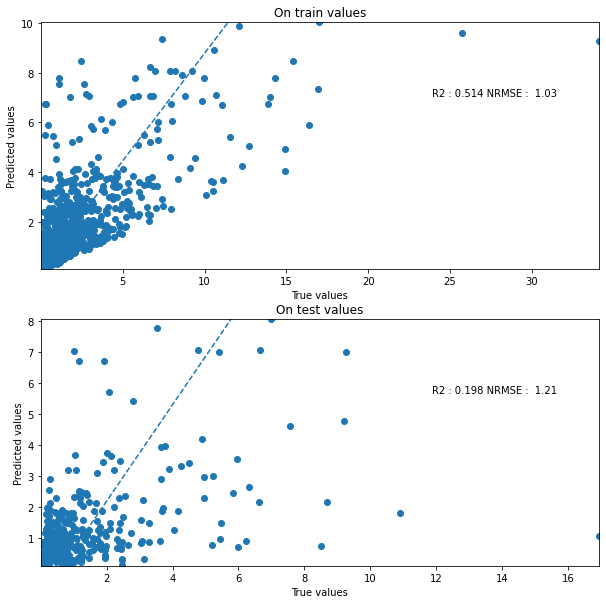

<Figure size 432x288 with 0 Axes>

In [52]:
model = KNeighborsRegressor(n_neighbors=4).fit(xtrain, ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))

In [12]:
x = input('Do you want to launch ? [y/n]')
if x == 'y':

    #let's try with a svr
    C_range = [1.0, 5.0, 10.0, 100.0]
    kernels = ['linear', 'rbf', 'sigmoid', 'poly']
    degrees = [2,3,4]
    gamma_range  = np.logspace(-2, 1, 10)
    #gamma_range = np.logspace(-2, 1, 10)
    #'gamma' : gamma_range
    param_grid = {'gamma' : gamma_range, 'kernel' : kernels, 'degree' : degrees}

    score = 'neg_mean_squared_error'

    svr_cv = GridSearchCV(svm.SVR(), param_grid, cv = 3, scoring = score, verbose = 1)

    svr_cv.fit(xtrain, ytrain)

    print('Best params on training set : {}'.format(svr_cv.best_params_))

Do you want to launch ? [y/n] y


Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best params on training set : {'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


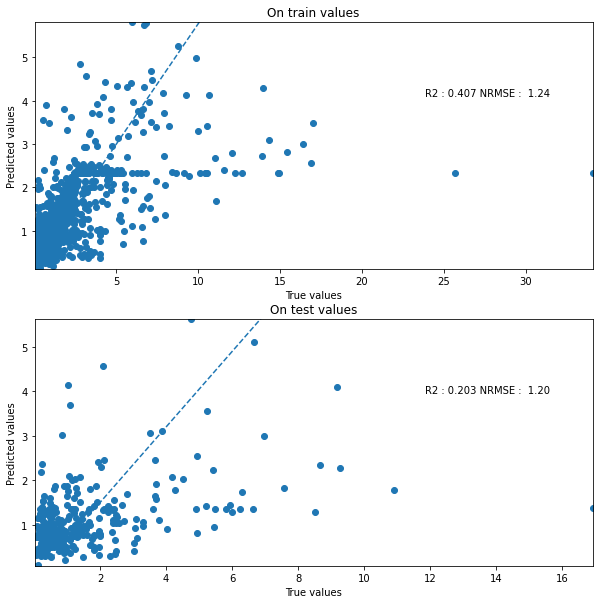

<Figure size 432x288 with 0 Axes>

In [53]:
svr = svm.SVR(kernel="rbf", C=1.0, gamma = 0.01, degree = 2)
svr = svr.fit(xtrain,ytrain)

true_pred_plot(ytrain, svr.predict(xtrain), ytest, svr.predict(xtest))

In [54]:
from sklearn import kernel_ridge
#let's try with a ridge regression

x = input('Do you want to launch ? [y/n]')
if x == 'y':
    alpha_range = [1.0, 5.0, 10.0, 100.0]
    kernels = ['linear', 'poly', 'sigmoid', 'rbf']
    degrees = [3,4,5]
    gamma_range  = np.logspace(-2, 1, 10)


    param_grid = {'gamma' : gamma_range, 'kernel' : kernels, 'degree' : degrees, 'alpha' : alpha_range}
    
    score = 'neg_mean_absolute_percentage_error'

    kernel_ridge_cv = GridSearchCV(kernel_ridge.KernelRidge(), param_grid, cv = 3, scoring = score, verbose = 1)

    kernel_ridge_cv.fit(xtrain, ytrain)

    print('Best params on training set : {}'.format(kernel_ridge_cv.best_params_))

Do you want to launch ? [y/n] y


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_mo

Best params on training set : {'alpha': 100.0, 'degree': 3, 'gamma': 0.021544346900318832, 'kernel': 'rbf'}


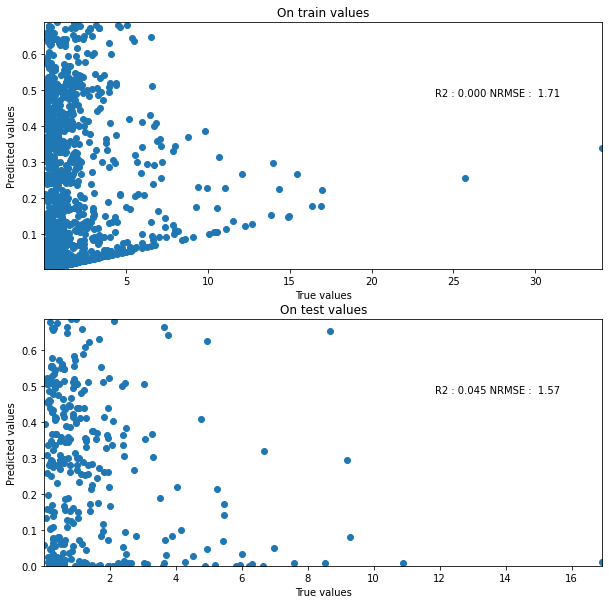

<Figure size 432x288 with 0 Axes>

In [55]:
model = kernel_ridge.KernelRidge(alpha = 100.0, kernel = 'rbf', degree = 3, gamma = 0.0215)
model = model.fit(xtrain, ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))

## Neural network

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [56]:
#test with a single perceptron
model1 = keras.Sequential()
model1.add(keras.Input(shape = xtrain.shape[1]))
model1.add(layers.Dense(1,input_dim = 2, activation = 'linear'))

model1.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model1.summary()

history = model1.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 523       
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1304/1304 [==============================] - 1s 886us/step - loss: 221.1221 - root_mean_squared_error: 3.4189
Epoch 2/50
1304/1304 [==============================] - 1s 906us/step - loss: 155.0963 - root_mean_squared_error: 3.3298
Epoch 3/50
1304/1304 [==============================] - 1s 898us/step - loss: 129.9527 - root_mean_squared_error: 3.3534
Epoch 4/50
1304/1304 [==============================] - 1s 868us/step - loss: 112.7396 - root_mean_squared_error: 3.3358
Epoch 5/50
1304/1304 [==============================] - 1s 879us/step - loss: 110.8870 - root_mean_s

11/11 [==============================] - 0s 901us/step


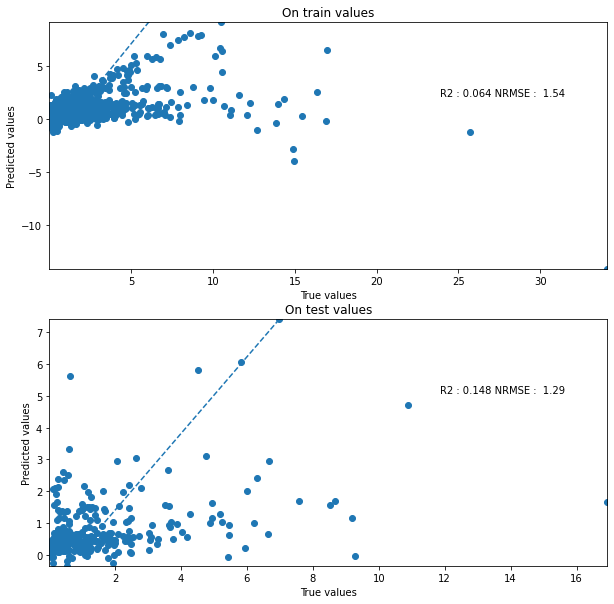

<Figure size 432x288 with 0 Axes>

In [57]:
true_pred_plot(ytrain, model1.predict(xtrain), ytest, model1.predict(xtest))

In [19]:
model2 = keras.Sequential(
    [
        layers.Dense(xtrain.shape[1], activation="relu", name="layer1", input_shape=(xtrain.shape[1],), input_dim = 2),
        layers.Dense(287, activation="relu", name="layer2"),
        layers.Dense(1, activation = 'linear', name="layer3"),
    ]
)

model2.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model2.summary()

history2 = model2.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 522)               273006    
                                                                 
 layer2 (Dense)              (None, 287)               150101    
                                                                 
 layer3 (Dense)              (None, 1)                 288       
                                                                 
Total params: 423,395
Trainable params: 423,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1304/1304 [==============================] - 3s 2ms/step - loss: 59.1145 - root_mean_squared_error: 2.0331
Epoch 2/50
1304/1304 [==============================] - 3s 2ms/step - loss: 43.5636 - root_mean_squared_error: 1.6853
Epoch 3/50
1304/1304 [==============================] - 3s 2ms/step - loss: 

11/11 [==============================] - 0s 2ms/step


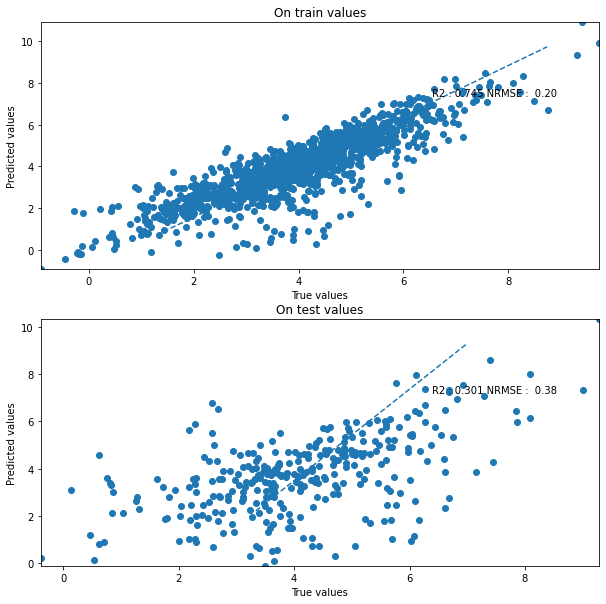

<Figure size 432x288 with 0 Axes>

In [20]:
true_pred_plot(ytrain, model2.predict(xtrain), ytest, model2.predict(xtest))

In [31]:
#now with a multi layer network

model3 = keras.Sequential(
    [
        layers.Dense(xtrain.shape[1], activation="relu", name="layer1", input_shape=(xtrain.shape[1],), input_dim = 2),
        layers.Dense(287, activation="relu", name="layer2b"),
        layers.Dense(82, activation="relu", name="layer3"),
        layers.Dense(20, activation="relu", name="layer4"),
        layers.Dense(4, activation = "relu", name = "layer5"),
        layers.Dense(1, activation = 'relu', name="layer6"),
    ]
)

model3.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model3.summary()

history3 = model3.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 522)               273006    
                                                                 
 layer2b (Dense)             (None, 287)               150101    
                                                                 
 layer3 (Dense)              (None, 82)                23616     
                                                                 
 layer4 (Dense)              (None, 20)                1660      
                                                                 
 layer5 (Dense)              (None, 4)                 84        
                                                                 
 layer6 (Dense)              (None, 1)                 5         
                                                                 
Total params: 448,472
Trainable params: 448,472
Non-tr

11/11 [==============================] - 0s 2ms/step


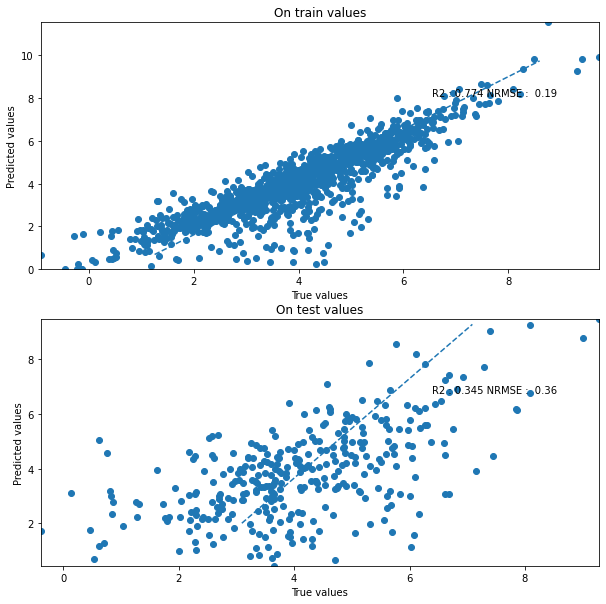

<Figure size 432x288 with 0 Axes>

In [32]:
true_pred_plot(ytrain, model3.predict(xtrain), ytest, model3.predict(xtest))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished


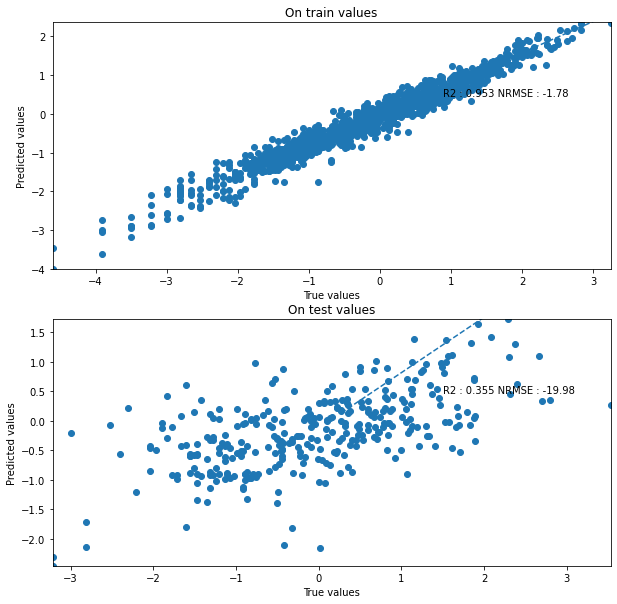

<Figure size 432x288 with 0 Axes>

In [61]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000, verbose = 1)

model = rfr.fit(xtrain,ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))

      Iter       Train Loss   Remaining Time 
         1           1.3486           11.03s
         2           1.2956           10.98s
         3           1.2512           10.63s
         4           1.2077           10.21s
         5           1.1735            9.75s
         6           1.1412            9.61s
         7           1.1159            9.36s
         8           1.0872            9.06s
         9           1.0634            8.92s
        10           1.0472            8.81s
        20           0.8998            8.23s
        30           0.8262            8.05s
        40           0.7547            7.82s
        50           0.7119            7.71s
        60           0.6830            7.61s
        70           0.6563            7.51s
        80           0.6319            7.38s
        90           0.6142            7.64s
       100           0.5989            7.60s
       200           0.4765            6.69s
       300           0.4076            5.83s
       40

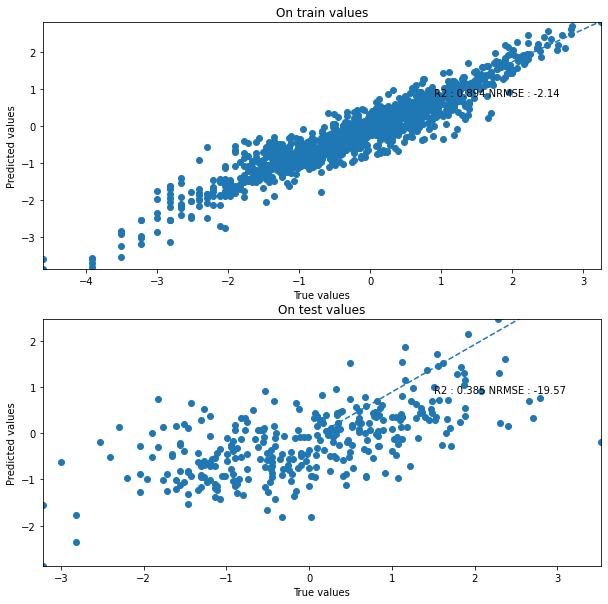

<Figure size 432x288 with 0 Axes>

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 1000, verbose = 1)
model = gbr.fit(xtrain, ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))

[16, 18, 24, 43, 46, 47, 48, 49, 51, 52, 54, 57, 62, 63, 66, 67, 68, 69, 70, 71, 73, 75, 76, 77, 79, 81, 84, 85, 89, 90, 96, 97, 98, 99, 101, 102, 105, 108, 111, 115, 116, 118, 121, 122, 125, 128, 130, 133, 136, 137, 138, 139, 141, 142, 145, 147, 149, 151, 152, 154, 156, 157, 159, 160, 161, 162, 163, 164, 167, 169, 174, 176, 177, 178, 180, 183, 184, 185, 187, 188, 191, 194, 195, 199, 202, 204, 206, 208, 209, 212, 213, 214, 217, 220, 221, 226, 229, 231, 232, 233, 235, 239, 240, 242, 251, 253, 258, 261, 262, 263, 264, 266, 267, 268, 273, 275, 277, 279, 281, 283, 285, 287, 290, 294, 295, 298, 299, 300, 303, 306, 308, 309, 310, 312, 314, 315, 318, 321, 327, 328, 329, 331, 333, 336, 340, 342, 343, 346, 347, 350, 351, 355, 356, 357, 360, 361, 362, 364, 366, 371, 372, 373, 375, 378, 379, 384, 385, 386, 388, 390, 392, 393, 398, 400, 401, 409, 411, 415, 416, 417, 418, 424, 427, 428, 431, 434, 440, 442, 443, 445, 446, 447, 456, 458, 459, 461, 464, 468, 469, 476, 482, 483, 491, 494, 496, 499, 509

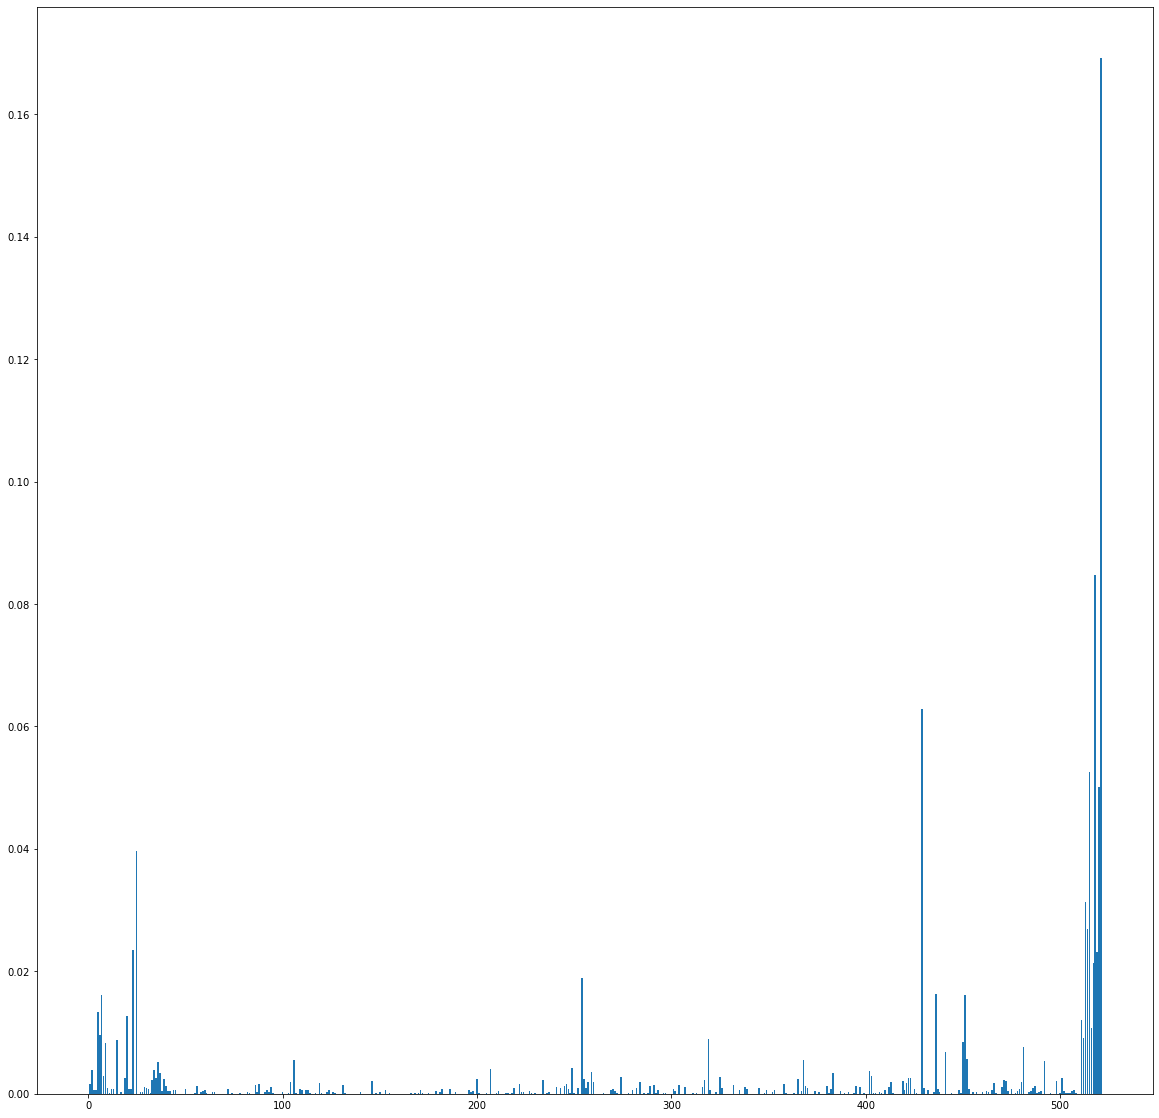

In [63]:
importance = model.feature_importances_
nul_col = []
for i,v in enumerate(importance):
    if v == 0:
        nul_col.append(i)
print(nul_col)
# plot feature importance
fig, ax = plt.subplots(figsize = (20,20))
ax.bar([x for x in range(len(importance))], importance)
plt.show()

      Iter       Train Loss   Remaining Time 
         1           1.3015            3.49s
         2           1.2519            3.24s
         3           1.2136            3.15s
         4           1.1798            3.10s
         5           1.1463            2.97s
         6           1.1181            2.97s
         7           1.1001            2.96s
         8           1.0734            2.89s
         9           1.0586            2.89s
        10           1.0396            2.84s
        20           0.9026            2.72s
        30           0.8250            2.64s
        40           0.7732            2.61s
        50           0.7325            2.53s
        60           0.6880            2.46s
        70           0.6568            2.40s
        80           0.6288            2.35s
        90           0.6095            2.29s
       100           0.5937            2.23s
       200           0.4643            1.70s
       300           0.3874            1.13s
       40

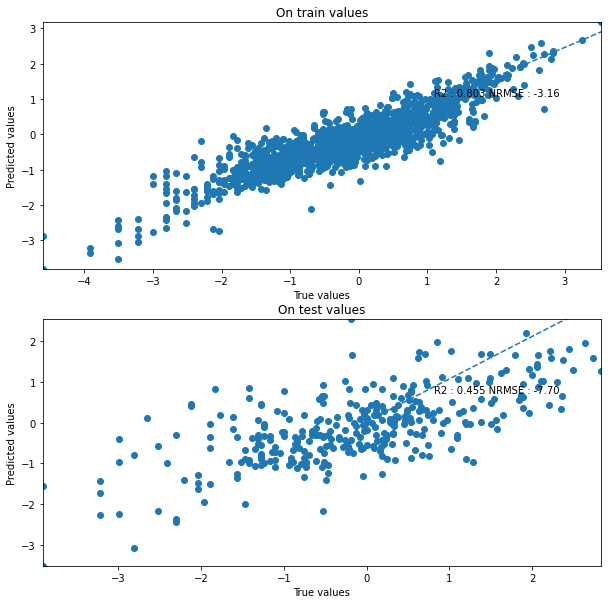

<Figure size 432x288 with 0 Axes>

In [64]:
#let's try to drop useless columns
label = []
for i in nul_col:
    label.append(data_num.columns[i])
data_test = data_num.drop(axis = 1, labels = label)

xtrain, xtest, ytrain, ytest = train_test_split(data_test, target, test_size = 0.2)

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)
#log scale the target
ytrain = np.log(ytrain)
ytest = np.log(ytest)

gbr = GradientBoostingRegressor(n_estimators = 500, verbose = 1)
model = gbr.fit(xtrain, ytrain)

true_pred_plot(ytrain, model.predict(xtrain), ytest, model.predict(xtest))